# Basics of network analysis

https://github.com/socialcomquant/summer-school-2022/blob/main/Day2_Tizzoni_Network_Analysis/2_network_analysis.ipynb

DataSet : https://snap.stanford.edu/data/ca-AstroPh.html

This is data of undirected graphs with the links representing co-authorship


Topics covered:
- Clustering Coefficient
- [ToDo] Shortest Paths and visualisations
- [ToDo] Centrality Measure


To Do: 
- Directed and unDirected difference in coeff
- Graph weights
- Difference between transitivity and clustering in terms of interpretation.
- Log-log plot

In [1]:
import networkx as nx

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
from itertools import islice
#This for slice the number of iterations in the loop

In [4]:
%matplotlib inline

In [5]:
path = './Data/ca-AstroPh.txt'

In [6]:
df = pd.read_csv(path, sep = '\t')
df.head()

,# FromNodeId,ToNodeId
0,84424,276
1,84424,1662
2,84424,5089
3,84424,6058
4,84424,6229


In [7]:
G = nx.Graph()

In [8]:
for i in list(range(0, len(df),1)):
    G.add_edge(df['# FromNodeId'][i],df['ToNodeId'][i])

In [9]:
len(G.nodes())

18772

In [10]:
len(G.edges())

198110

## Components in connected graphs

In [11]:
nx.is_connected(G)
#This should be false if there are components

False

In [12]:
nx.number_connected_components(G)

290

In [13]:
Node_Len = []
for k in nx.connected_components(G):
    Node_Len = np.append(Node_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.

In [14]:
len(Node_Len)

290

In [15]:
max(Node_Len)

17903.0

In [16]:
Components = list(nx.connected_components(G))

In [17]:
pos = 0
for j in range(1,len(Components),1):
    
    if(len(Components[j]) == max(Node_Len)):
        pos = j

#There would be a better sorting algo

In [18]:
len(Components[pos])

17903

In [19]:
G_C_Max = G.subgraph(Components[pos])

In [20]:
len(G_C_Max.nodes())
nx.is_connected(G_C_Max)
#This subgraphs is connected. #Could also be the largest co-author community.
len(G) - len(G_C_Max)

# Most of the authors are in the above sub group

869

## Clustering coefficients

Local and global clustering coefficients. 

In [21]:
#Number of triangles in the graph
tt = sum(list(nx.triangles(G_C_Max).values()))/3

In [22]:
#Total number of possible triangles, Here the triplets could also be open and hence not needed to be all 3
tpt = math.factorial(len(G_C_Max.nodes()))/(math.factorial(3) * math.factorial(len(G_C_Max.nodes()) - 3))

In [23]:
#Transitivity
4050042/956210276151.0

nx.transitivity(G_C_Max)

0.31777791273391154

In [24]:
#Would like to print the distribution of the local clustering coefficients. This would give the centralised?
ClusteringCoefL = nx.clustering(G_C_Max)

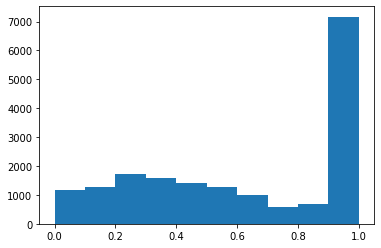

In [25]:
#The key would be the node id
plt.hist(ClusteringCoefL.values())
plt.show()
#This would mean, it is quiete a connected graphs, a majority of neighbours are connected with the neighbours.

In [26]:
nx.average_clustering(G_C_Max)

0.6328232091518589

## [Practicing] Airport dataset

In this lets explore the visualisation and also the shortest distance, using the airport data set.

In [27]:
Airport_Codes = pd.read_csv('./Data/US_Airport_Code.txt', header=None, sep=' ')

In [28]:
Airport_Codes.head()

,0,1,2
0,29,78,95
1,29,114,37483
2,29,117,47
3,29,134,16
4,29,169,40


In [29]:
Airport_Codes.columns = ['From', 'To', 'Passenger_Count']

In [30]:
Airport_Codes.head()

,From,To,Passenger_Count
0,29,78,95
1,29,114,37483
2,29,117,47
3,29,134,16
4,29,169,40


In [31]:
#Here the graph is undirected (this according to the documentation) is mainly due to equal weighting for to and fro passengers (symmetric)// This seems directed

A = nx.DiGraph()

for k in range(0,Airport_Codes.shape[0],1):
    A.add_edge(int(Airport_Codes['From'][k]),int(Airport_Codes['To'][k]))

In [32]:
len(A)

405

In [33]:
Airport_Loc = pd.read_csv('./Data/US_Airport_Loc.txt', sep = ' ')

In [34]:
Airport_Loc.head()

,id,code,city,lat,lon
0,29,ABE,Allentown,40.654722,-75.438333
1,30,ABI,Abilene,32.409444,-99.679722
2,32,ABQ,Albuquerque,35.041667,-106.606389
3,33,ABR,Aberdeen,45.449722,-98.421667
4,35,ABY,Albany,31.532222,-84.196111


In [35]:
# This is for defining the dictionary for additional attributes to the graph
A.code = {}
A.pos = {}

In [36]:
for j in range(0,Airport_Loc.shape[0],1):
    node = Airport_Loc['id'][j]
    A.code[node] = Airport_Loc['code'][j]
    A.pos[node] = (float(Airport_Loc['lon'][j]), float(Airport_Loc['lat'][j]))

(-127.04962499999999, -65.237875, 23.3436116, 50.0063884)

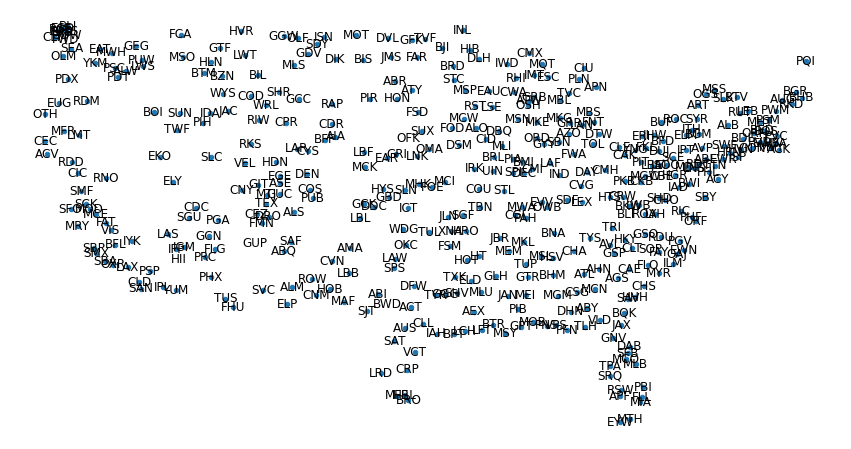

In [37]:
fig = plt.figure(figsize=(15,8))

nx.draw_networkx_nodes(A, pos = A.pos, node_size=20)
nx.draw_networkx_labels(A,pos=A.pos,labels=A.code)

plt.axis('off')

In [38]:
nx.number_strongly_connected_components(A)

5

In [39]:
# This is undirected graph for comparison
A_U = nx.Graph()
for k in range(0,Airport_Codes.shape[0],1):
    A_U.add_edge(int(Airport_Codes['From'][k]),int(Airport_Codes['To'][k]))

In [40]:
len(A_U.nodes())

405

In [41]:
len(A.nodes())

405

### Exploring Connectedness

In [42]:
# For this particular lets explore the clustering.
# This is a directed graph, so total possible formula would be different.

ClusteringCoeffs = nx.clustering(A)


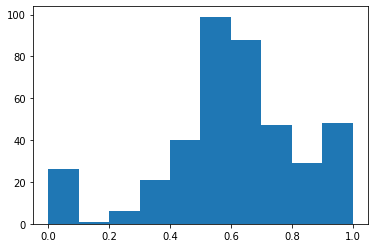

In [43]:
plt.hist(ClusteringCoeffs.values())
plt.show()

#This shows for most there are more that half of the possible directed edges in the neighbours, ie it is interconnected.

In [44]:
#Just considering connections and not the number of passengers (Weight)
nx.average_clustering(A)

0.6097876398260947

In [45]:
#Degree distribution // Could use less objects
deg = np.array(nx.degree(A))
InD = np.array(A.in_degree(nx.nodes(A)))
OutD = np.array(A.out_degree(nx.nodes(A)))

deg_c = []
InD_c = []
OutD_c = []

for i in range(0,len(deg),1):
    deg_c = np.append(deg_c,deg[i][1])
    InD_c = np.append(InD_c,InD[i][1])
    OutD_c = np.append(OutD_c,OutD[i][1])

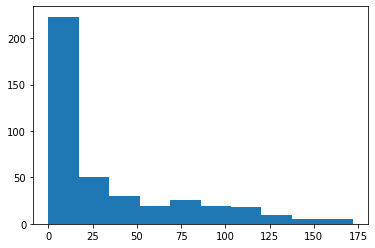

In [46]:
plt.hist(InD_c)
plt.show()

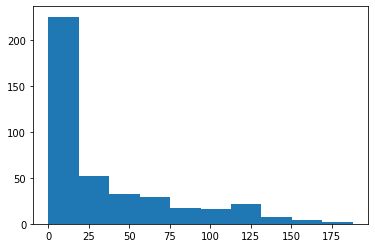

In [47]:
plt.hist(OutD_c)
plt.show()

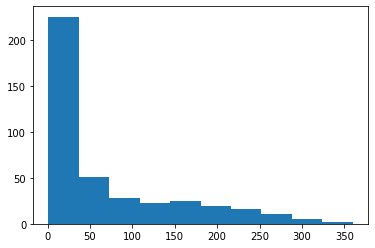

In [48]:
plt.hist(deg_c)
plt.show()

In [49]:
#There could be if else case statement, also the print could be better
for i in range(0,len(deg_c),1):
    if (deg[i][1] == max(deg_c)):
        d = deg[i][0]

    if (InD[i][1] == max(InD_c)):
        j = InD[i][0]

    if (OutD[i][1] == max(OutD_c)):
        o = OutD[i][0]


print('Airport with max connections-',max(deg_c),'\n',Airport_Loc[Airport_Loc['id'] == d],'\n')
print('Airport with max in-connections-',max(InD_c),'\n',Airport_Loc[Airport_Loc['id'] == j],'\n')
print('Airport with max out-connections-', max(OutD_c),'\n', Airport_Loc[Airport_Loc['id'] == o],'\n')

Airport with max connections- 360.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max in-connections- 172.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max out-connections- 188.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 



In [50]:
#To Do >> Log Log plot

In [51]:
#Lets calculate centrality measurese, this is a directed graph
Components_airports = list(nx.strongly_connected_components(A))

In [52]:
#Degrees here are not very clear in this directed graph

SubGraph_Len = []

#for k in Components_airports:
    
   # print(len(A.subgraph(k).in()))
    
    #print(len(nx.subgraph(k).nodes()))
  #  SubGraph_Len = np.append(SubGraph_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.
    

### Paths

In [53]:
Source = 1437 #San Fransisco
Target = 500  #New York

In [54]:
# Possible paths
#Path_List = nx.all_simple_paths(A,29,30)
#Path_List_R = nx.all_simple_paths(A,1437,500) #As this is directed graph

In [55]:
def k_shortest_paths(G, source, target,k):
    return list(islice(nx.shortest_simple_paths(G, source, target), k))

In [56]:
#Calculating all the paths is intense, mainly due to connectedness
Paths = k_shortest_paths(A,Source,Target,10)

In [57]:
edges_p = pd.DataFrame()
nodes_p = []
pos = 0
for i in Paths:

    for k in range(0,len(i)-1,1):
         edges_p[pos] = [i[k],i[k+1]]
         pos = pos + 1
    
    for j in i:
        nodes_p = np.append(nodes_p, j)

edges_p = edges_p.transpose()

In [58]:
edges_p.columns = ['From','To']
edges_p.head()

,From,To
0,1437,500
1,1437,32
2,32,500
3,1437,75
4,75,500


In [59]:
Path_Graph = nx.DiGraph()

In [60]:
for i in nodes_p:
    Path_Graph.add_node(i)

for j in range(0, edges_p.shape[0],1):
    Path_Graph.add_edge(edges_p['From'][j],edges_p['To'][j])

In [61]:
# There would be a faster way here

Path_Graph.code = {}
Path_Graph.pos = {}
counter = 0

for j in range(0,len(Path_Graph.nodes()),1):
    node = np.array(Path_Graph.nodes())[j]
    
    for k in range(0,Airport_Loc.shape[0],1):
        counter = counter + 1
        if(node == Airport_Loc['id'][k]):
            Path_Graph.code[node] = Airport_Loc['code'][k]
            Path_Graph.pos[node] = (float(Airport_Loc['lon'][k]), float(Airport_Loc['lat'][k]))

In [62]:
Path_Graph_Shortest = nx.DiGraph()
Shortest_Path = nx.shortest_path(A, Source, Target)

In [63]:
for t in Shortest_Path:
    Path_Graph_Shortest.add_node(t)

#This is specific here as there is direct flight
Path_Graph_Shortest.add_edge(Source,Target)

In [64]:
Path_Graph_Shortest.code = {}
Path_Graph_Shortest.pos = {}
Path_Graph_Shortest.label = {}
counter = 0

for j in range(0,len(Path_Graph_Shortest.nodes()),1):
    node = np.array(Path_Graph_Shortest.nodes())[j]
    
    for k in range(0,Airport_Loc.shape[0],1):
        counter = counter + 1
        if(node == Airport_Loc['id'][k]):
            Path_Graph_Shortest.code[node] = Airport_Loc['code'][k]
            Path_Graph_Shortest.pos[node] = (float(Airport_Loc['lon'][k]), float(Airport_Loc['lat'][k]))
            Path_Graph_Shortest.label[node] = Airport_Loc['code'][k]

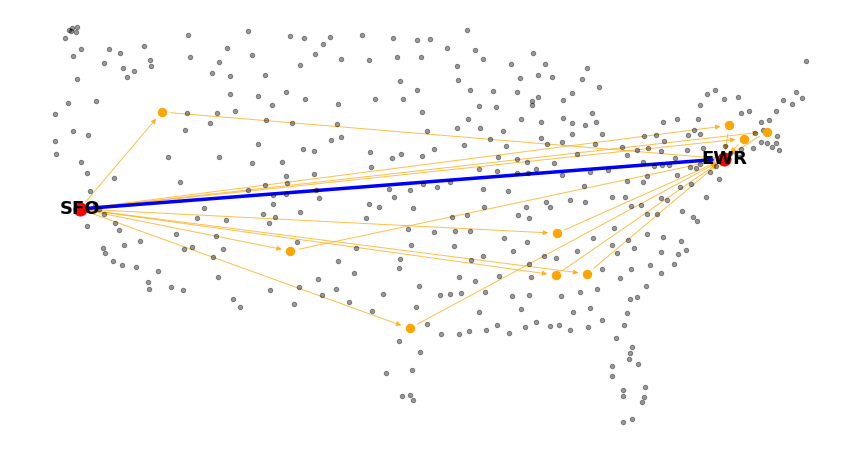

In [65]:
fig = plt.figure(figsize=(15,8))

nx.draw_networkx_nodes(A, pos = A.pos, node_size=20, node_color='#000000', alpha=0.4)
#nx.draw_networkx_labels(A,pos=A.pos,labels=A.code)

nx.draw_networkx_nodes(Path_Graph, pos = Path_Graph.pos, node_size=70, node_color='Orange')
nx.draw_networkx_edges(Path_Graph,pos = Path_Graph.pos, edge_color='Orange', alpha= 0.7)


nx.draw_networkx_nodes(Path_Graph_Shortest, pos = Path_Graph_Shortest.pos, node_size=170, node_color='Red')
nx.draw_networkx_edges(Path_Graph_Shortest,pos = Path_Graph_Shortest.pos, edge_color='Blue', width=3.5)
nx.draw_networkx_labels(Path_Graph_Shortest,pos = Path_Graph_Shortest.pos, labels= Path_Graph_Shortest.label, font_color='Black', font_weight='bold', font_size = 18)

plt.axis('off')
plt.show()

## Rough

In [66]:
Node_Len.sort()

(array([141., 120.,  17.,   3.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

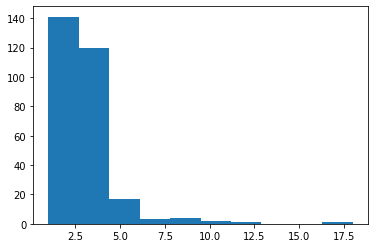

In [67]:
plt.hist(Node_Len[0:289])

In [68]:
t = nx.nodes(A)

In [69]:
np.array(t)

array([  29,   78,  114,  117,  134,  169,  206,  296,  300,  311,  317,
        381,  391,  403,  432,  435,  489,  526,  534,  609,  610,  619,
        691,  709,  716,  727,  731,  760,  880,  899,  918,  978,  982,
        994, 1022, 1029, 1066, 1101, 1200, 1252, 1264, 1313, 1359, 1374,
       1391, 1435, 1504, 1517, 1628, 1700,   30,  478,  590,  719, 1461,
       1470,   32,   75,   76,   82,  123,  145,  158,  176,  211,  215,
        216,  239,  246,  321,  327,  334,  343,  356,  358,  389,  494,
        500,  507,  585,  595,  622,  677,  685,  686,  711,  718,  749,
        757,  874,  875,  877,  879,  964,  998, 1011, 1047, 1061, 1068,
       1072, 1176, 1185, 1201, 1231, 1240, 1255, 1297, 1304, 1320, 1353,
       1372, 1403, 1405, 1408, 1413, 1426, 1433, 1437, 1480, 1529, 1596,
       1613, 1630,   33,  118,   35,  598,   38,  498,  700,  702, 1090,
         39,  335,  536,  872, 1008, 1629, 1645,   40,  196,  271, 1350,
         41,   60,  256,  258,  344,  361,  375,  5